In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import squidpy as sq
import anndata as ad

### raw slices

In [12]:
slice_Rep1 = sc.read_h5ad('/SABench/Data/BCA_processed/XeniumBCARep1_processed.h5ad')
slice_Rep2 = sc.read_h5ad('/SABench/Data/BCA_processed/XeniumBCARep2_processed.h5ad')

slice_namesX=['Xenium_Rep1','Xenium_Rep2']
groupX=[slice_Rep1,slice_Rep2]

/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [13]:
slice_Rep1

AnnData object with n_obs × n_vars = 167780 × 313
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'Cluster'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'Cluster_colors'
    obsm: 'spatial'

In [14]:
slice_Rep2

AnnData object with n_obs × n_vars = 118752 × 313
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'Cluster'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'Cluster_colors'
    obsm: 'spatial'

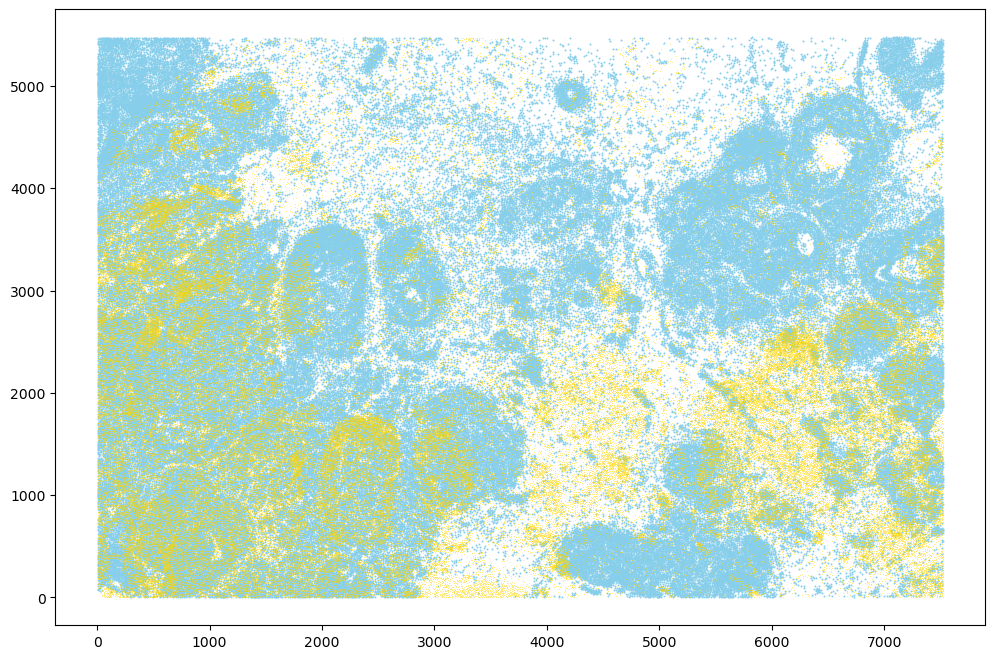

In [15]:
## plot style setup
fig = plt.figure(figsize=(12, 8))
ax = plt.gca()

ax.scatter(
    slice_Rep1.obsm['spatial'][:,0],
    slice_Rep1.obsm['spatial'][:,1],
    s=2,
    linewidth=0,
    edgecolor=None,
    marker="o",
    color="skyblue"
)

ax.scatter(
    slice_Rep2.obsm['spatial'][:,0],
    slice_Rep2.obsm['spatial'][:,1],
    s=0.2,
    linewidth=0,
    edgecolor=None,
    marker="o",
    color="gold"
)

### change resolutions

In [16]:
def Change_slices_resolution(adata, nx, ny):

    spatial_coords = adata.obsm['spatial']
    x_min, x_max = np.min(spatial_coords[:, 0]), np.max(spatial_coords[:, 0])
    y_min, y_max = np.min(spatial_coords[:, 1]), np.max(spatial_coords[:, 1])
    dx = (x_max - x_min) / nx
    dy = (y_max - y_min) / ny
    
    new_spatial_coords = []
    aggregated_X = []
    
    for i in range(nx):
        for j in range(ny):
            x_center = x_min + (i + 0.5) * dx
            y_center = y_min + (j + 0.5) * dy

            x_start, x_end = x_min + i*dx, x_min + (i+1)*dx
            y_start, y_end = y_min + j*dy, y_min + (j+1)*dy
            
            rect_mask = (spatial_coords[:, 0] >= x_start) & (spatial_coords[:, 0] < x_end) & \
                        (spatial_coords[:, 1] >= y_start) & (spatial_coords[:, 1] < y_end)
            
            if np.any(rect_mask):
                agg_X = np.sum(adata.X[rect_mask], axis=0)
                new_spatial_coords.append([x_center, y_center])
                aggregated_X.append(agg_X)
    
    new_obs = pd.DataFrame(index=range(len(new_spatial_coords)), columns=['x_center', 'y_center'])
    new_obs[['x_center', 'y_center']] = np.array(new_spatial_coords)
    
    new_adata = ad.AnnData(X=np.squeeze(aggregated_X), obs=new_obs, var=adata.var)
    new_adata.obsm['spatial'] = np.array(new_spatial_coords)
    
    return new_adata

In [17]:
slice_Rep1_10x10 = Change_slices_resolution(slice_Rep1, 10, 10)
slice_Rep2_10x10 = Change_slices_resolution(slice_Rep2, 10, 10)

/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


### check

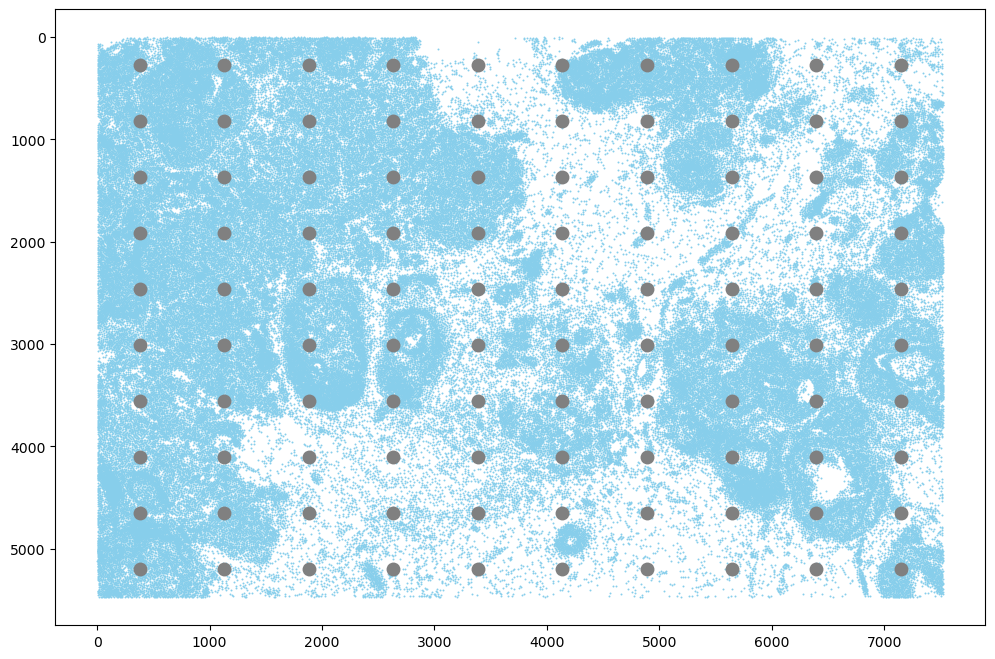

In [18]:
## plot style setup
fig = plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.invert_yaxis()

ax.scatter(
    slice_Rep1.obsm['spatial'][:,0],
    slice_Rep1.obsm['spatial'][:,1],
    s=2,
    linewidth=0,
    edgecolor=None,
    marker="o",
    color="skyblue"
)

ax.scatter(
    slice_Rep1_10x10.obsm['spatial'][:,0],
    slice_Rep1_10x10.obsm['spatial'][:,1],
    s=100,
    linewidth=0,
    edgecolor=None,
    marker="o",
    color="gray"
)

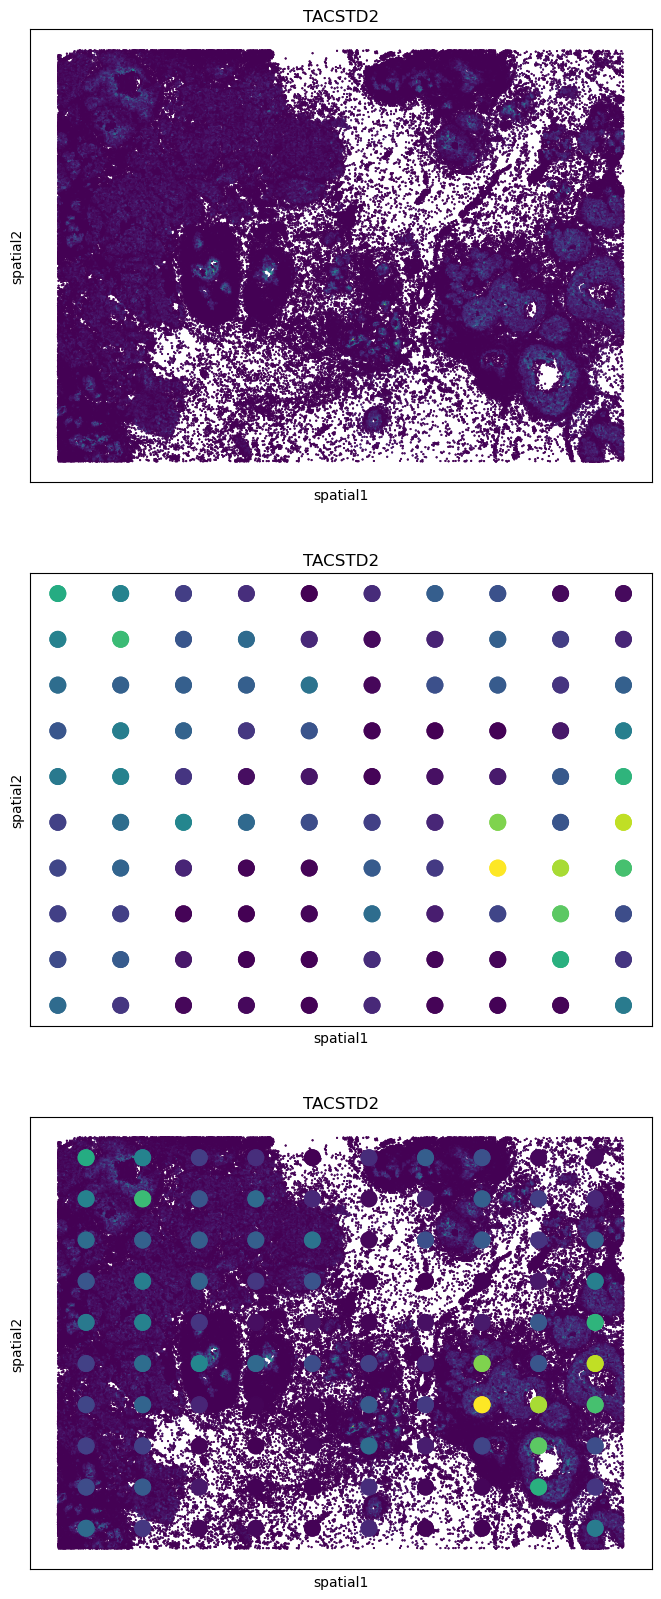

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(30, 20))  
     
sq.pl.spatial_scatter(slice_Rep1,library_id="spatial",shape=None,color="TACSTD2",wspace=1,ax=axs[0],size=1,colorbar=False)
sq.pl.spatial_scatter(slice_Rep1_10x10,library_id="spatial",shape=None,color="TACSTD2",wspace=1,ax=axs[1],size=500,colorbar=False)
sq.pl.spatial_scatter(slice_Rep1,library_id="spatial",shape=None,color="TACSTD2",wspace=1,ax=axs[2],size=1,colorbar=False)
sq.pl.spatial_scatter(slice_Rep1_10x10,library_id="spatial",shape=None,color="TACSTD2",wspace=1,ax=axs[2],size=500,colorbar=False)

axs[2].invert_yaxis()
plt.show()

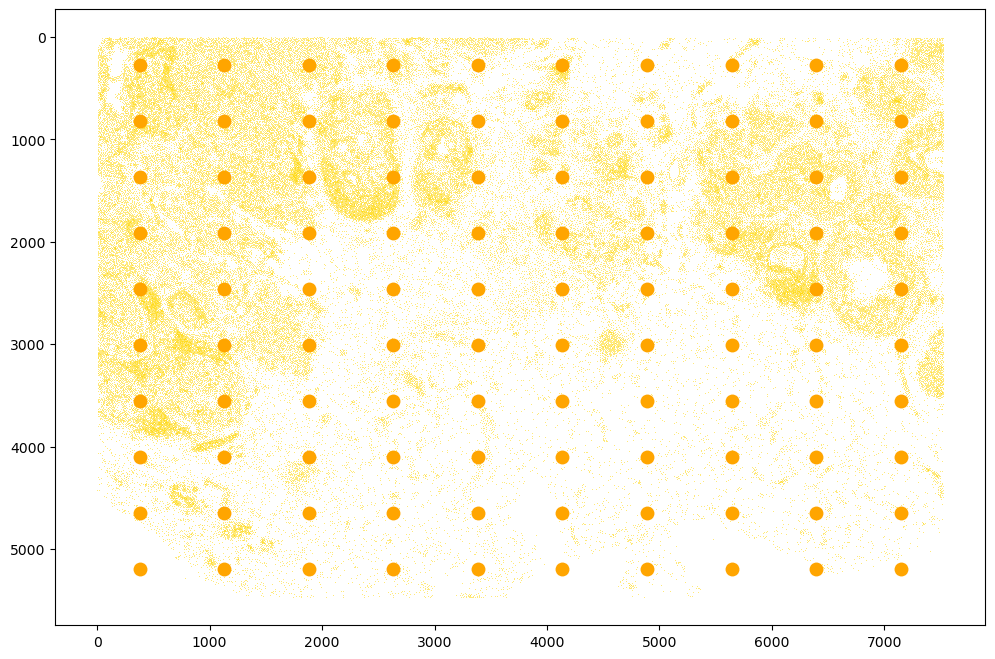

In [20]:
## plot style setup
fig = plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.invert_yaxis()

ax.scatter(
    slice_Rep2.obsm['spatial'][:,0],
    slice_Rep2.obsm['spatial'][:,1],
    s=0.2,
    linewidth=0,
    edgecolor=None,
    marker="o",
    color="gold"
)
ax.scatter(
    slice_Rep2_10x10.obsm['spatial'][:,0],
    slice_Rep2_10x10.obsm['spatial'][:,1],
    s=100,
    linewidth=0,
    edgecolor=None,
    marker="o",
    color="orange"
)

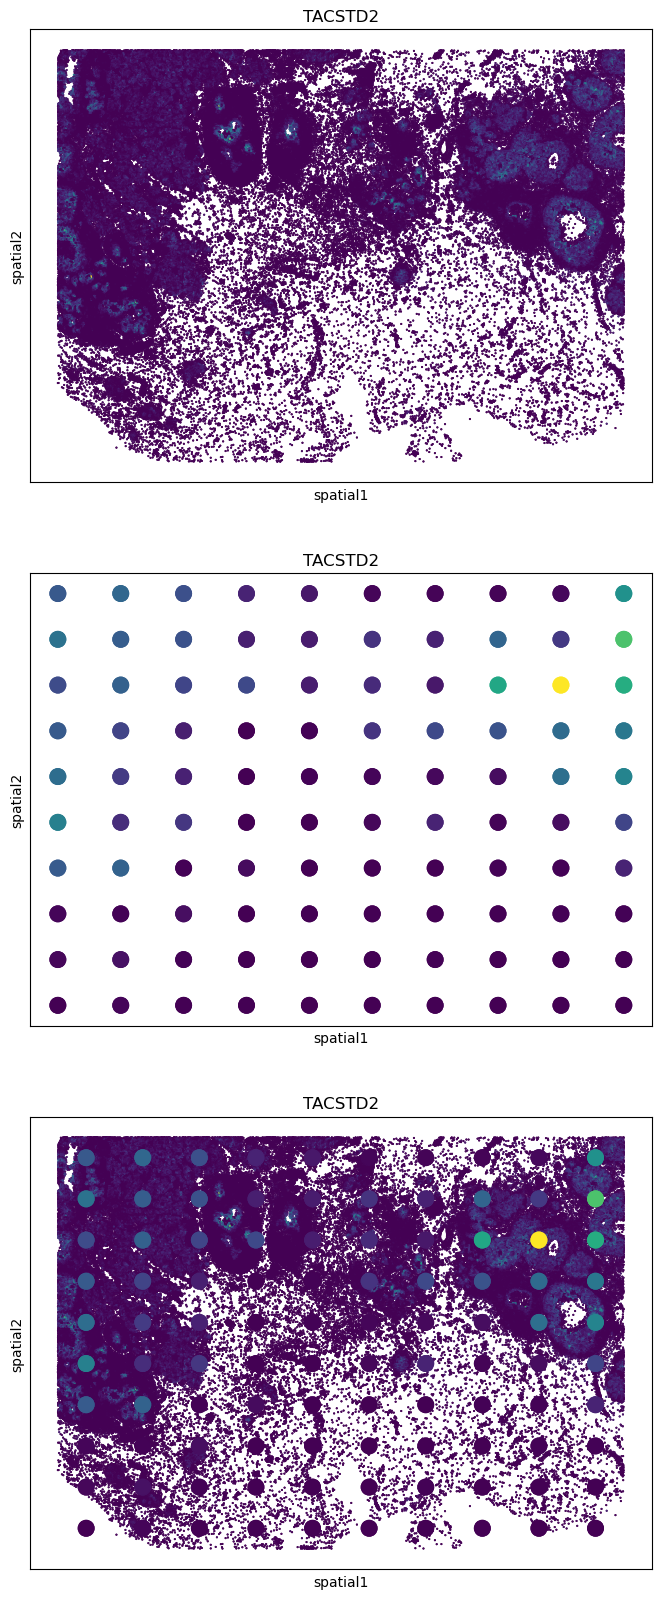

In [21]:
fig, axs = plt.subplots(3, 1, figsize=(30, 20))  
     
sq.pl.spatial_scatter(slice_Rep2,library_id="spatial",shape=None,color="TACSTD2",wspace=1,ax=axs[0],size=1,colorbar=False)
sq.pl.spatial_scatter(slice_Rep2_10x10,library_id="spatial",shape=None,color="TACSTD2",wspace=1,ax=axs[1],size=500,colorbar=False)
sq.pl.spatial_scatter(slice_Rep2,library_id="spatial",shape=None,color="TACSTD2",wspace=1,ax=axs[2],size=1,colorbar=False)
sq.pl.spatial_scatter(slice_Rep2_10x10,library_id="spatial",shape=None,color="TACSTD2",wspace=1,ax=axs[2],size=500,colorbar=False)

axs[2].invert_yaxis()
plt.show()

### Save data

In [23]:
for i in range(1,26):
    slice_Rep1_i0xi0 = Change_slices_resolution(slice_Rep1, i*25, i*25)
    slice_Rep2_i0xi0 = Change_slices_resolution(slice_Rep2, i*25, i*25)
    print(slice_Rep1_i0xi0)
    print(slice_Rep2_i0xi0)
    slice_Rep1_i0xi0.write_h5ad('/SABench/Improvement/BCA/Data_DR/slice_Rep1_'+str(i*25)+'x'+str(i*25)+'.h5ad')
    slice_Rep2_i0xi0.write_h5ad('/SABench/Improvement/BCA/Data_DR/slice_Rep2_'+str(i*25)+'x'+str(i*25)+'.h5ad')

/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 625 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 608 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 2496 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 2390 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 5547 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 5223 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 9621 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 8772 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 14518 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 12805 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 20106 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 17294 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 26336 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 22079 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 33110 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 27086 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 40371 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 32480 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 48044 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 37918 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 56026 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 43569 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 64269 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 49335 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 72637 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 55071 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 81010 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 60804 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 89290 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 66292 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 97099 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 71508 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 104705 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 76640 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 111720 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 81286 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 118164 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 85509 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 124186 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 89574 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 129587 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 93085 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 134395 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 96318 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 138764 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 99134 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 142478 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 101553 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 145913 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 103797 × 313
    obs: 'x_center', 'y_center'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
